# <u> Dissecting racial bias in an algorithm used to manage the health of populations </u>

# Part A: Data Access

In [77]:
import pandas as pd
url = "https://gitlab.com/labsysmed/dissecting-bias/-/raw/master/data/data_new.csv?inline=false"
df = pd.read_csv(url)

In [78]:
df

,risk_score_t,program_enrolled_t,cost_t,cost_avoidable_t,bps_mean_t,ghba1c_mean_t,hct_mean_t,cre_mean_t,ldl_mean_t,race,...,trig_min-high_tm1,trig_min-normal_tm1,trig_mean-low_tm1,trig_mean-high_tm1,trig_mean-normal_tm1,trig_max-low_tm1,trig_max-high_tm1,trig_max-normal_tm1,gagne_sum_tm1,gagne_sum_t
0,1.987430,0,1200.0,0.0,NaN,5.4,NaN,1.110000,194.0,white,...,0,0,0,0,0,0,0,0,0,0
1,7.677934,0,2600.0,0.0,119.0,5.5,40.4,0.860000,93.0,white,...,0,1,0,0,1,0,0,1,4,3
2,0.407678,0,500.0,0.0,NaN,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,0,0,0,0
3,0.798369,0,1300.0,0.0,117.0,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,0,0,0,0
4,17.513165,0,1100.0,0.0,116.0,NaN,34.1,1.303333,53.0,white,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48779,0.611517,0,800.0,0.0,NaN,NaN,NaN,1.090000,148.0,white,...,0,0,0,0,0,0,0,0,0,0
48780,2.615933,0,2200.0,0.0,112.0,NaN,41.4,0.810000,172.0,white,...,0,1,0,0,1,0,0,1,1,1
48781,1.358926,0,800.0,0.0,105.0,NaN,NaN,NaN,NaN,white,...,0,1,0,0,1,0,0,1,1,0
48782,10.990318,0,1300.0,0.0,132.0,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,0,0,3,3


# Part B: Reproduce Fig. 1

Visualize risk score percentiles against mean number of active chronic conditions within that percentile. For example, I thought I would try spliting out male and female patients. I also think the figure looks a bit nicer with axes inverted. 

In [79]:
import seaborn as sns
from matplotlib import pyplot as plt

In [80]:
# Plot for females
df_female_w = df[(df["dem_female"] == True) & (df["race"] == "white")]
df_female_b = df[(df["dem_female"] == True) & (df["race"] == "black")]

# Plot for males
df_male_w = df[(df["dem_female"] == False) & (df["race"] == "white")]
df_male_b = df[(df["dem_female"] == True) & (df["race"] == "black")]

In [81]:
df_female_w['percentile_risk'] = (df_female_w['risk_score_t'].rank(pct=True) * 100).round()
df_female_b['percentile_risk'] = (df_female_b['risk_score_t'].rank(pct=True) * 100).round()

df_male_w['percentile_risk'] = (df_male_w['risk_score_t'].rank(pct=True) * 100).round()
df_male_b['percentile_risk'] = (df_male_b['risk_score_t'].rank(pct=True) * 100).round()

/var/folders/g2/ybhd80ns31sc72zl62c5qcjm0000gn/T/ipykernel_55313/847333239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female_w['percentile_risk'] = (df_female_w['risk_score_t'].rank(pct=True) * 100).round()
/var/folders/g2/ybhd80ns31sc72zl62c5qcjm0000gn/T/ipykernel_55313/847333239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female_b['percentile_risk'] = (df_female_b['risk_score_t'].rank(pct=True) * 100).round()
/var/folders/g2/ybhd80ns31sc72zl62c5qcjm0000gn/T/ipykernel_55313/847333239

In [82]:
df_female_w["chronic_illness_mean"] = df_female_w.groupby("percentile_risk")["gagne_sum_t"].transform('mean')
df_female_b["chronic_illness_mean"] = df_female_b.groupby("percentile_risk")["gagne_sum_t"].transform('mean')


df_male_w["chronic_illness_mean"] = df_male_w.groupby("percentile_risk")["gagne_sum_t"].transform('mean')
df_male_b["chronic_illness_mean"] = df_male_b.groupby("percentile_risk")["gagne_sum_t"].transform('mean')


/var/folders/g2/ybhd80ns31sc72zl62c5qcjm0000gn/T/ipykernel_55313/3692393164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female_w["chronic_illness_mean"] = df_female_w.groupby("percentile_risk")["gagne_sum_t"].transform('mean')
/var/folders/g2/ybhd80ns31sc72zl62c5qcjm0000gn/T/ipykernel_55313/3692393164.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female_b["chronic_illness_mean"] = df_female_b.groupby("percentile_risk")["gagne_sum_t"].transform('mean')
/var/folders/g2/ybhd80ns31sc72zl62c5

In [83]:
concat_female = pd.concat([df_female_w, df_female_b])
concat_male = pd.concat([df_male_w, df_male_b])


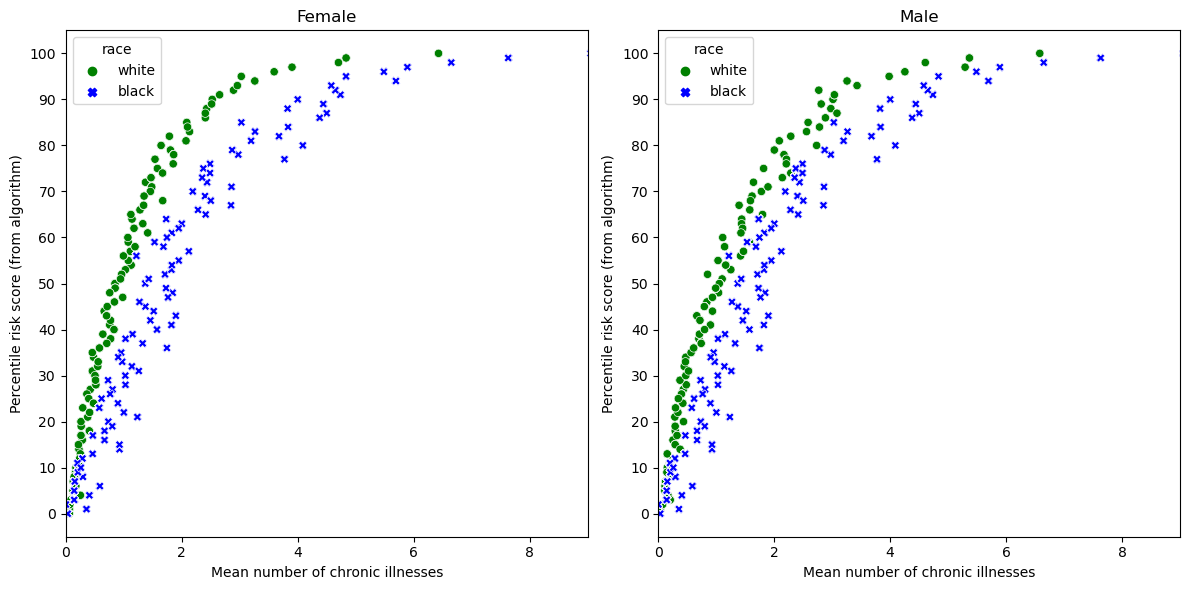

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
custom_palette = ["green", "blue"]

sns.scatterplot(data=concat_female, x="chronic_illness_mean", y="percentile_risk", hue="race", style="race", ax=axes[0], palette=custom_palette)
axes[0].set_xlabel('Mean number of chronic illnesses')
axes[0].set_ylabel('Percentile risk score (from algorithm)')
axes[0].set_title('Female')
axes[0].set_yticks(range(0, 101, 10))
axes[0].set_xticks(range(0, 9, 2))
axes[0].set_xlim(0, 9)

sns.scatterplot(data=concat_male, x="chronic_illness_mean", y="percentile_risk", hue="race", style="race", ax=axes[1], palette=custom_palette)
axes[1].set_xlabel('Mean number of chronic illnesses')
axes[1].set_ylabel('Percentile risk score (from algorithm)')
axes[1].set_title('Male')
axes[1].set_yticks(range(0, 101, 10))
axes[1].set_xticks(range(0, 9, 2))
axes[1].set_xlim(0, 9)

plt.tight_layout()
plt.show()

Include a brief discussion of the meaning of this plot. Suppose that Patient A is Black, that Patient B is White, and that both Patient A and Patient B have exactly the same chronic illnesses. Are Patient A and Patient B equally likely to be referred to the high-risk care management program?

If Patient A and Patient B have exactly the same chronic illnesses they are not equally likely to be referred ot the high-risk care management program. Patient B is more likely to be referred as for the same number mean number of chronic illnesses, white patients are given a higher percentile risk score.

# Part C: Reproduce Fig. 3

In [85]:
df_w = df[df["race"] == "white"]
df_b = df[df["race"] == "black"]

In [86]:
df_w['percentile_risk'] = (df_w['risk_score_t'].rank(pct=True) * 100).round()
df_b['percentile_risk'] = (df_b['risk_score_t'].rank(pct=True) * 100).round()

/var/folders/g2/ybhd80ns31sc72zl62c5qcjm0000gn/T/ipykernel_55313/3671706551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_w['percentile_risk'] = (df_w['risk_score_t'].rank(pct=True) * 100).round()
/var/folders/g2/ybhd80ns31sc72zl62c5qcjm0000gn/T/ipykernel_55313/3671706551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b['percentile_risk'] = (df_b['risk_score_t'].rank(pct=True) * 100).round()


In [87]:
mean_cost_w = (df_w.groupby('percentile_risk')['cost_t'].mean()).reset_index()
mean_cost_w['race'] = 'white'
mean_cost_b = (df_b.groupby('percentile_risk')['cost_t'].mean()).reset_index()
mean_cost_b['race'] = 'black'

In [88]:
mean_gagne_w = (df_w.groupby('gagne_sum_t')['cost_t'].mean()).reset_index()
mean_gagne_w['race'] = 'white'
mean_gagne_b = (df_b.groupby('gagne_sum_t')['cost_t'].mean()).reset_index()
mean_gagne_b['race'] = 'black'

In [89]:
concat_cost = pd.concat([mean_cost_w, mean_cost_b])
concat_gagne = pd.concat([mean_gagne_w, mean_gagne_b])

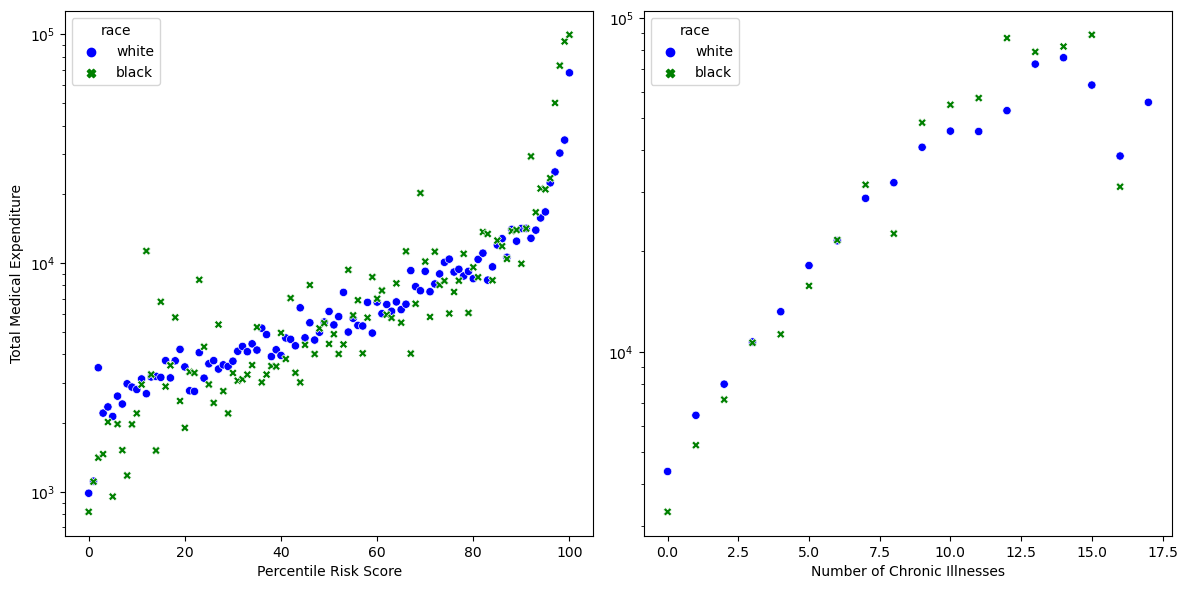

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
custom_palette = ["blue", "green"]

sns.scatterplot(data=concat_cost, x="percentile_risk", y="cost_t", hue="race", style="race", ax=axes[0], palette=custom_palette)
axes[0].set_xlabel('Percentile Risk Score')
axes[0].set_ylabel('Total Medical Expenditure')
axes[0].set_yscale('log')

sns.scatterplot(data=concat_gagne, x="gagne_sum_t", y="cost_t", hue="race", style="race", ax=axes[1], palette=custom_palette)
axes[1].set_xlabel('Number of Chronic Illnesses')
axes[1].set_ylabel('')
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

We can see from the graph on the left that the total medical expenditure is higher on average for white patients with the same percentile risk score as black patients. The right plot shows that for five or fewer chronic illnesses, white patients receive higher total medical expenditure. It is important to note too that the majority of patients have five or fewer chronic illnesses.

# Part D: Modeling Cost Disparity

## 1. Data Prep

### First, determine the percentage of the patients in the data with 5 or fewer chronic conditions. Does this percentage justify the choice to focus on these patients?

In [91]:
percent_five_cond = (len(df[df["gagne_sum_t"] <= 5])/ len(df)) * 100
percent_five_cond

95.53952115447689

95.5% of patients in the data have five or fewer chronic conditions. Therefore we can justify focusing on these patients as they represent the vast majority of cases.

### Create a new column of the data set which is just the logarithm of the cost. This is called a log-transform. We’ll use this as our target variable. Log transforms are common when the target variable varies widely across several orders of magnitude. Because log(0) is undefined, you should subset the data so that patients who incurred $0 in medical costs are removed.

In [115]:
import numpy as np

df = df[df["cost_t"] != 0]
df["log_cost"] = np.log(df["cost_t"])


df["log_cost"]

/var/folders/g2/ybhd80ns31sc72zl62c5qcjm0000gn/T/ipykernel_55313/3063579173.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_cost"] = np.log(df["cost_t"])


0        7.090077
1        7.863267
2        6.214608
3        7.170120
4        7.003065
           ...   
48779    6.684612
48780    7.696213
48781    6.684612
48782    7.170120
48783    8.389360
Name: log_cost, Length: 46887, dtype: float64

### Create a dummy (one-hot encoded) column for the qualitative race variable in which 0 means that the patient is white and 1 means that the patient is Black.


In [116]:
df["is_black"] = df["race"] == "black"

df

/var/folders/g2/ybhd80ns31sc72zl62c5qcjm0000gn/T/ipykernel_55313/2106412620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["is_black"] = df["race"] == "black"


,risk_score_t,program_enrolled_t,cost_t,cost_avoidable_t,bps_mean_t,ghba1c_mean_t,hct_mean_t,cre_mean_t,ldl_mean_t,race,...,trig_mean-low_tm1,trig_mean-high_tm1,trig_mean-normal_tm1,trig_max-low_tm1,trig_max-high_tm1,trig_max-normal_tm1,gagne_sum_tm1,gagne_sum_t,log_cost,is_black
0,1.987430,0,1200.0,0.0,NaN,5.4,NaN,1.110000,194.0,white,...,0,0,0,0,0,0,0,0,7.090077,False
1,7.677934,0,2600.0,0.0,119.0,5.5,40.4,0.860000,93.0,white,...,0,0,1,0,0,1,4,3,7.863267,False
2,0.407678,0,500.0,0.0,NaN,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,0,0,6.214608,False
3,0.798369,0,1300.0,0.0,117.0,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,0,0,7.170120,False
4,17.513165,0,1100.0,0.0,116.0,NaN,34.1,1.303333,53.0,white,...,0,0,0,0,0,0,1,1,7.003065,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48779,0.611517,0,800.0,0.0,NaN,NaN,NaN,1.090000,148.0,white,...,0,0,0,0,0,0,0,0,6.684612,False
48780,2.615933,0,2200.0,0.0,112.0,NaN,41.4,0.810000,172.0,white,...,0,0,1,0,0,1,1,1,7.696213,False
48781,1.358926,0,800.0,0.0,105.0,NaN,NaN,NaN,NaN,white,...,0,0,1,0,0,1,1,0,6.684612,False
48782,10.990318,0,1300.0,0.0,132.0,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,3,3,7.170120,False


### Separate the data into predictor variables X and target variable y (the log-cost). For predictor variables, just use the dummy columns for race and the number of active chronic conditions.

In [121]:
X_train = df[["is_black", "gagne_sum_t"]]
y_train = df["log_cost"]

## 2. Modeling

Function that will construct data sets with polynomial features of various sizes:

In [118]:
def add_polynomial_features(X, degree):
  X_ = X.copy()
  for j in range(1, degree):
    X_[f"poly_{j}"] = X_["gagne_sum_t"]**j
  return X_

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

score = 0
best_score = float('-inf')

# increase degrees until score of LR begins to decrease or plateau
for degrees in range(1,11):
        
    X_features = add_polynomial_features(X_train, degrees)
    cols = X_features.columns

    LR = LinearRegression()
    LR.fit(X_features, y_train)
    score = cross_val_score(LR, X_features, y_train, cv=5).mean()
    
    if (score > best_score):
        best_score = score
        best_degrees = degrees
        best_cols = cols

print(f"{best_cols=}") 
print(f"{best_degrees=}")    
print(f"{best_score=}")

best_cols=Index(['is_black', 'gagne_sum_t', 'poly_1', 'poly_2', 'poly_3', 'poly_4',
       'poly_5', 'poly_6', 'poly_7', 'poly_8', 'poly_9'],
      dtype='object')
best_degrees=10
best_score=0.14830062340213399


Once you have determined a degree that seems reasonable for this data set, construct a copy of the data with the correct number of polynomial features and fit one last linear regression model.

In [143]:
X_features = add_polynomial_features(X_train, 10)
LR = LinearRegression()
LR.fit(X_features, y_train)
score = cross_val_score(LR, X_features, y_train, cv=5).mean()
score

0.14830062340213399

You can access the coefficients of the linear regression model as LR.coef_. Determine which of these coefficients corresponds to Black race (the coefficients are in the same order as the variables in the data frame used for training). 

In [144]:
features = X_features.columns
coefs = LR.coef_

feature_coefs = dict(zip(features, coefs))
feature_coefs

{'is_black': -0.26711487503849624,
 'gagne_sum_t': 0.5088163229433447,
 'poly_1': 0.5088164579853922,
 'poly_2': -1.0305677844477263,
 'poly_3': 0.5880247944191436,
 'poly_4': -0.1776219992097652,
 'poly_5': 0.03115568304493425,
 'poly_6': -0.0032705785216849033,
 'poly_7': 0.00020192700428754498,
 'poly_8': -6.7458039893789564e-06,
 'poly_9': 9.390071161850347e-08}

Finally, compute e^wb. What is your estimate of the cost incurred by Black patients as a percentage of white patients. Does it roughly support the argument of Obermeyer et al. (2019)?

In [145]:
import math

math.exp(feature_coefs["is_black"])

0.7655851197936364

My model shows that black patients incur a cost of 76% of that of white patients. This supports the argument of Obermeyer et al. (2019) as it proves that less money is spent on Black patients who have the same level of need. Therefore as the algorithm uses cost as a proxy for need it thus falsely concludes that Black patients are healthier than equally sick White patients. Reformulating the algorithm so that it no longer uses costs as a proxy for needs eliminates the racial bias in predicting who needs extra care.

Construct a copy of the data with the correct number of polynomial features and fit one last linear regression model.